In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

13092747 (2013-2023) Non-ref

" " 

12413370 (2010-2021) ref, 2490, 28.2

" "

13266000 ref (2017-2018)

" "

 13311000 (2012-2023) Usgs:  646619.3

" "

12305000 (2012-2023)

" "

13340600


In [2]:
data=pd.read_csv(r"../data_prep/prism_df_summer_13296000.csv")  
#12413370,
#13266000,
#13296000,
#13311000, 13340600, 13092747, 12305000, 13342500, 13150430

print(data)
print(data.columns)

     Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0           153  2012-06-01      0.00               1.0                9.8   
1           154  2012-06-02      1.73               2.4               12.3   
2           155  2012-06-03      0.96               4.8               11.7   
3           156  2012-06-04      0.01               5.4               12.8   
4           157  2012-06-05      0.00               3.5               13.8   
..          ...         ...       ...               ...                ...   
898        3775  2022-08-27      0.00               8.1               16.4   
899        3776  2022-08-28      0.00               5.3               13.0   
900        3777  2022-08-29      0.00               3.2               13.1   
901        3778  2022-08-30      0.00               4.4               15.6   
902        3779  2022-08-31      0.00               7.1               17.9   

     tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  vpdmax

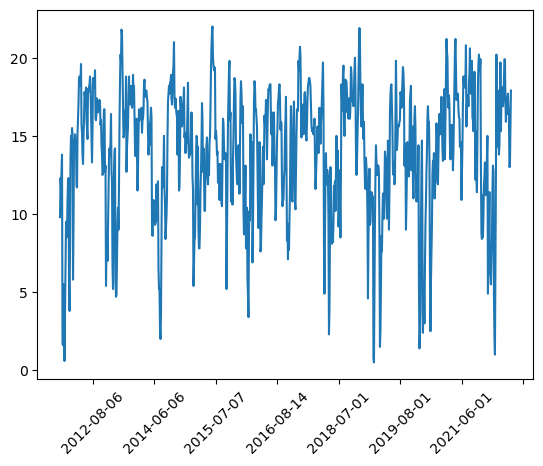

In [66]:
plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

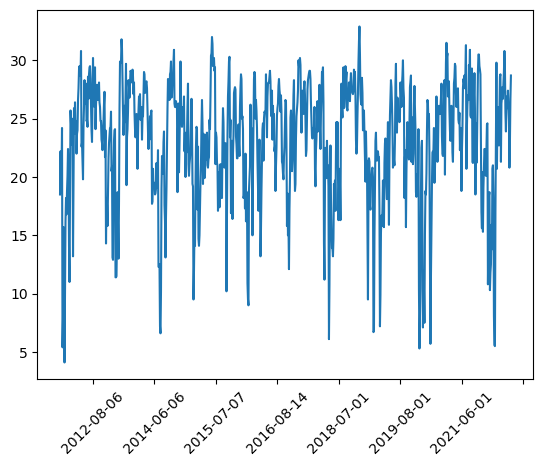

In [67]:
plt.plot(data['Date'] , data[ 'tmax..degrees.C.'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

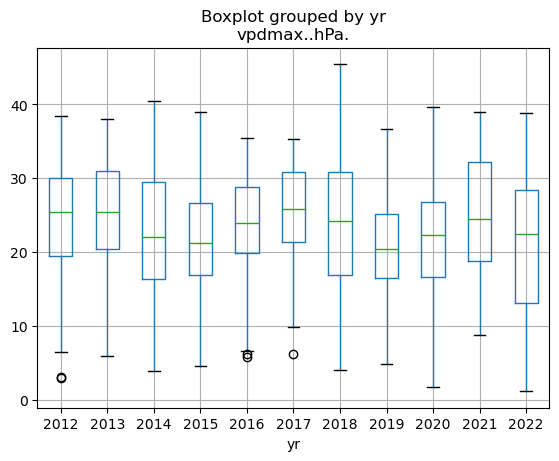

In [73]:
# 'vpdmax..hPa.'
data.boxplot(column=['vpdmax..hPa.'], by='yr')
plt.show()

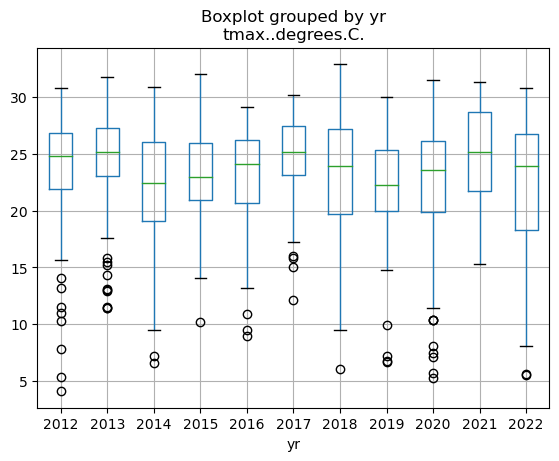

In [68]:
data.boxplot(column=['tmax..degrees.C.'], by='yr')
plt.show()

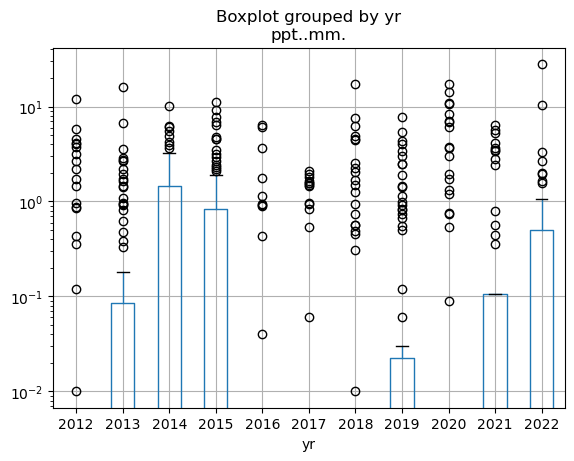

In [72]:
data.boxplot(column=['ppt..mm.'], by='yr')

plt.yscale('log')
plt.show()

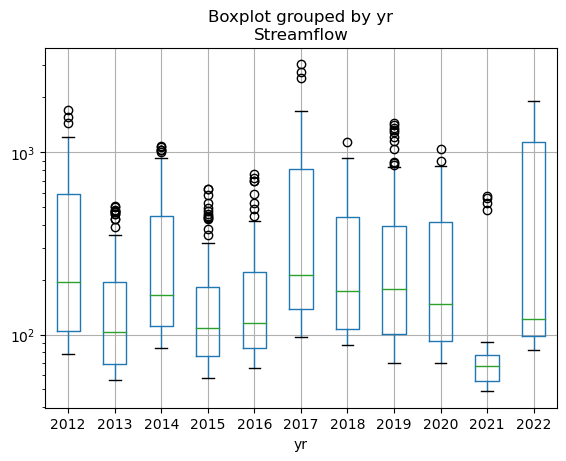

In [74]:
data.boxplot(column=['X_00060_00003'], by='yr')
plt.yscale('log')
plt.title("Streamflow")
plt.show()

In [3]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.699675
X_00010_00001,0.699675,1.000000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.138980          -0.339560   
tmin..degrees.C.   -0.138980          1.000000           0.921538   
tmean..degrees.C.  -0.339560          0.921538           1.000000   
tmax..degrees.C.   -0.444003          0.790301           0.966145   
tdmean..degrees.C.  0.318098          0.455822           0.230518   
vpdmin..hPa.       -0.377925          0.622565           0.743669   
vpdmax..hPa.       -0.456320          0.693680           0.897902   
X_00010_00001      -0.248552          0.650891           0.717169   
X_00010_00003      -0.221220          0.737962           0.784687   
X_00060_00003       0.153287         -0.423766          -0.456032   
doy                -0.139159          0.444051           0.469333   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -0.444003            0.318098     -0.377925   
tmin..degrees.C.       

<Axes: >

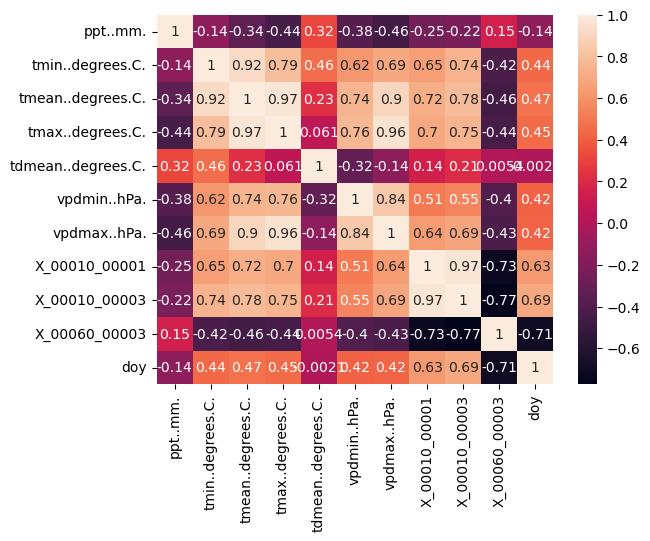

In [4]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
ppt..mm.           1.000000          -0.339560     -0.456320       0.153287
tmean..degrees.C. -0.339560           1.000000      0.897902      -0.456032
vpdmax..hPa.      -0.456320           0.897902      1.000000      -0.426679
X_00060_00003      0.153287          -0.456032     -0.426679       1.000000


<Axes: >

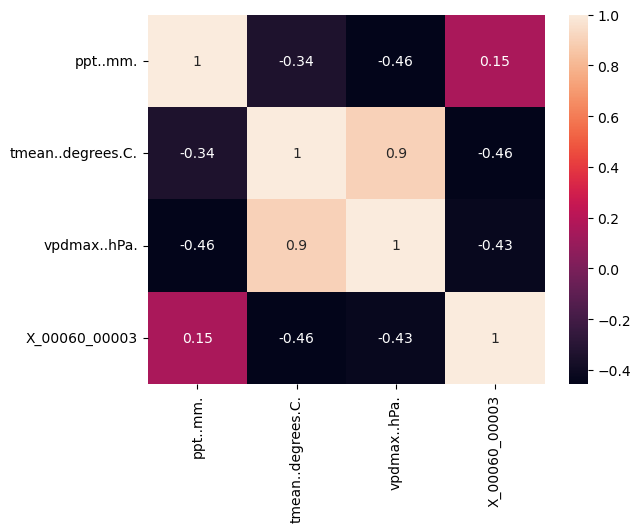

In [5]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.', 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [6]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_train.columns)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
10       0.00                3.8          6.68          635.0
841      0.00               19.9         32.31           54.0
363      0.00               17.8         32.66           58.8
821      0.00               18.3         23.40           69.5
792      0.00               19.5         27.42           76.4
..        ...                ...           ...            ...
106      0.95                5.2         10.59          287.0
270      1.67                8.5          8.59           98.0
860      2.68                6.2          4.54         1410.0
435      0.00               15.6         28.42           78.2
102      0.00               16.4         24.43          432.0

[722 rows x 4 columns]
10      6.0
841    14.4
363    13.9
821    14.5
792    14.5
       ... 
106     8.8
270    10.8
860     5.7
435    13.2
102    10.3
Name: X_00010_00003, Length: 722, dtype: float64
Index(['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hP

In [7]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]
X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']







['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003', 'yr']
0       7.4
1       6.9
2       6.7
3       6.8
4       5.0
       ... 
799    14.1
800    13.7
801    13.2
802    12.6
803    10.9
Name: X_00010_00003, Length: 804, dtype: float64


0.9130519292902034


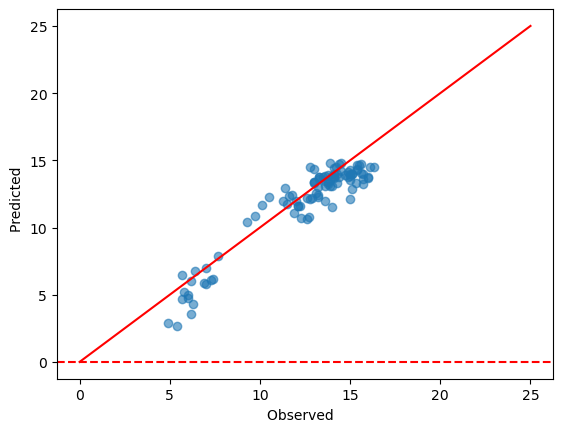

test: 0.9456052791577485
0.9806757467128105


In [8]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [9]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.8165498602305189
test correlation_coefficient: 0.9042986623193673
MSE: 1.5051932813355224
RMS: 1.7610761450031684
max depth: 2
test correlation_coefficient: 0.8805069159236104
test correlation_coefficient: 0.9254189219083637
MSE: 1.2715792967824378
RMS: 1.5639564999921607
max depth: 3
test correlation_coefficient: 0.9142914780227527
test correlation_coefficient: 0.9481383603885563
MSE: 1.0040869967059287
RMS: 1.2836490285415456
max depth: 4
test correlation_coefficient: 0.9351320661536977
test correlation_coefficient: 0.9476537079101948
MSE: 0.8895518244465856
RMS: 1.1705357901313744
max depth: 5
test correlation_coefficient: 0.9504243052017791
test correlation_coefficient: 0.9453664943409016
MSE: 0.8529216144951168
RMS: 1.1243855989595428
max depth: 6
test correlation_coefficient: 0.9641386786366068
test correlation_coefficient: 0.9468986945393597
MSE: 0.8400093778158914
RMS: 1.0891461154268474
max depth: 7
test correlation_coefficient: 0.9

max depth: 5
correlation_coefficient: 0.9453664943409016
MSE: 0.8529216144951168
RMS: 1.1243855989595428


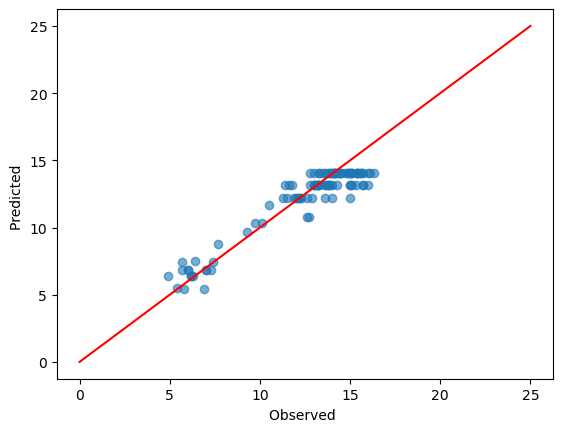

In [10]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [11]:
print(regr.feature_importances_)
print(idv)

[0.00134713 0.16655826 0.00822924 0.80906742 0.01479794]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']


In [12]:
params = {
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [13]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.3818


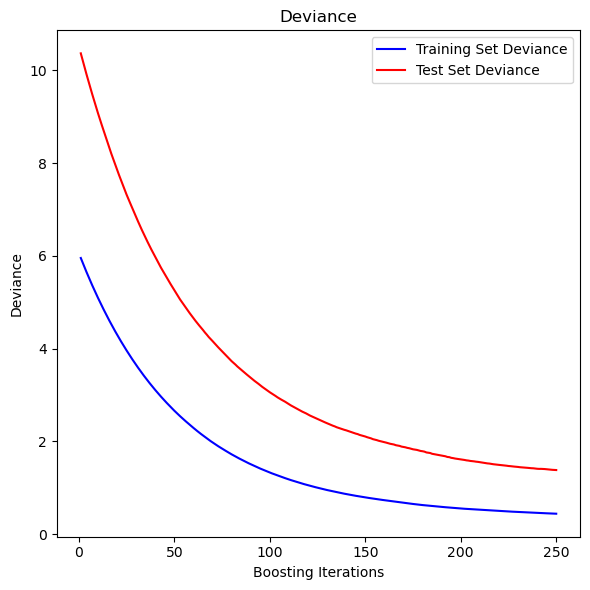

In [14]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

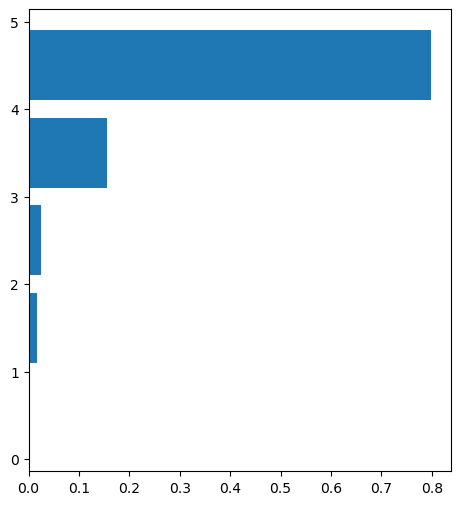

In [15]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [16]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [17]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

The plot on the left shows the Gini importance of the model. 

permuting a feature

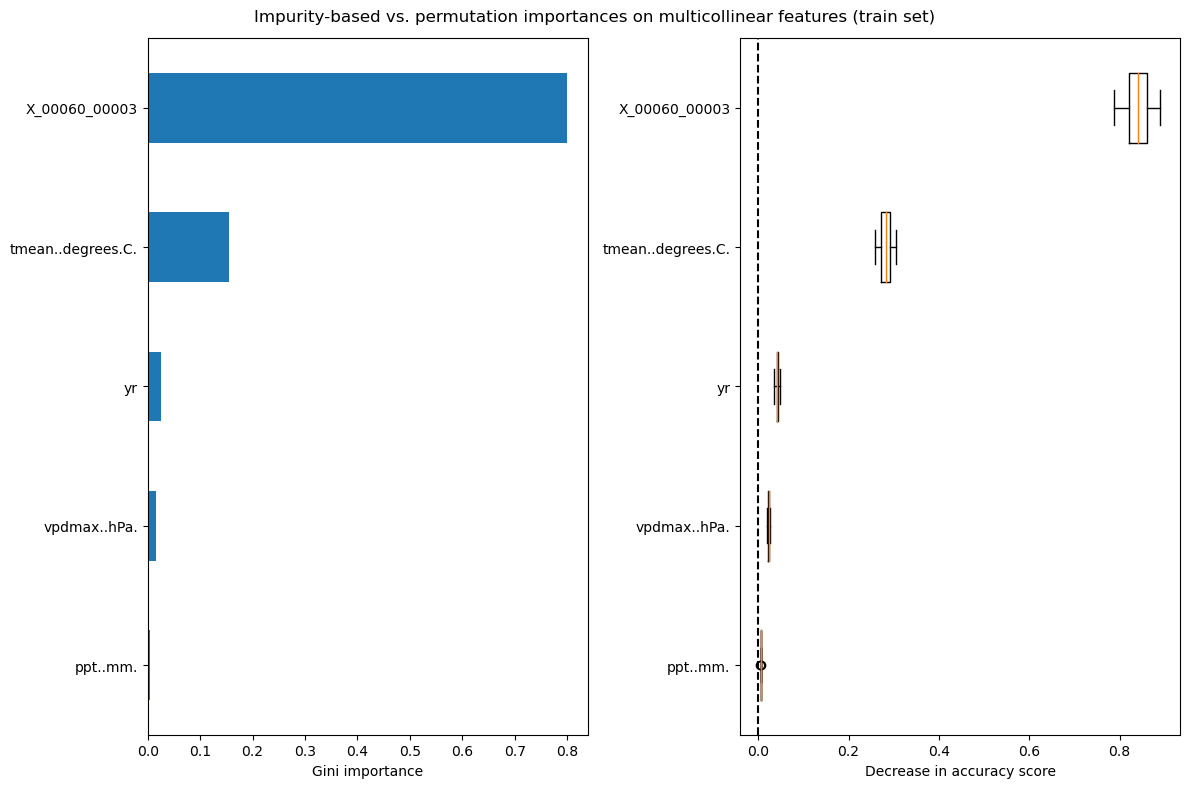

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.9564584600089939
MSE: 0.9310259673996826
RMS: 1.1755499085699717


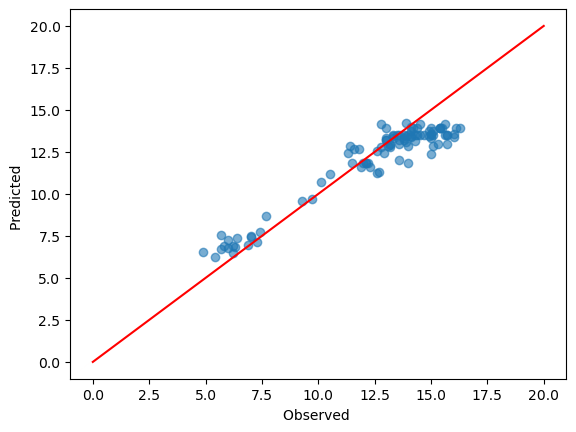

In [58]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

804     9.3
805     9.7
806    10.1
807    10.5
808    15.0
       ... 
898    13.0
899    12.6
900    12.8
901    13.2
902    13.3
Name: X_00010_00003, Length: 99, dtype: float64
[ 9.60505927  9.71720384 10.70757478 11.16686268 13.52452829 13.72896579
 13.52452829 13.75691509 14.22102066 12.96405693 13.54486673 13.42416746
 13.52452829 13.30292393 13.51051635 13.89450717 14.17161796 13.48256704
 13.48256704 13.89450717 13.89450717 13.55870431 13.49455834 12.96405693
 13.4127441  13.92504505 13.52452829 12.35127959 12.8449848  12.04028232
 11.81789014 12.8449848  13.48256704 13.91501501 14.17161796 13.89450717
 13.89450717 13.89450717 12.4325231  11.6311491  11.26884511 11.81789014
 11.29540001 11.6311491  11.83076453 12.40821303 12.64592297 11.83076453
 11.81789014 11.81789014 12.69894452 12.8449848   6.89968747  7.40515654
  7.4757298   7.53584876  6.72972512  6.75594797  6.83143618  7.2538858
  7.41950862  7.70742325  6.95098488  6.89290117  6.25590897  6.57036805
  6.49804244  7.10

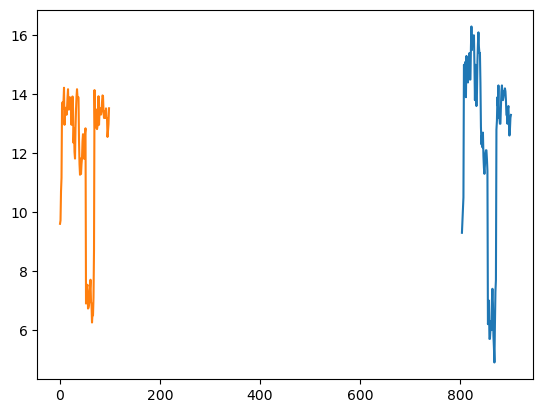

804    2021-06-01
805    2021-06-02
806    2021-06-03
807    2021-06-04
808    2021-07-15
          ...    
898    2022-08-27
899    2022-08-28
900    2022-08-29
901    2022-08-30
902    2022-08-31
Name: Date, Length: 99, dtype: object


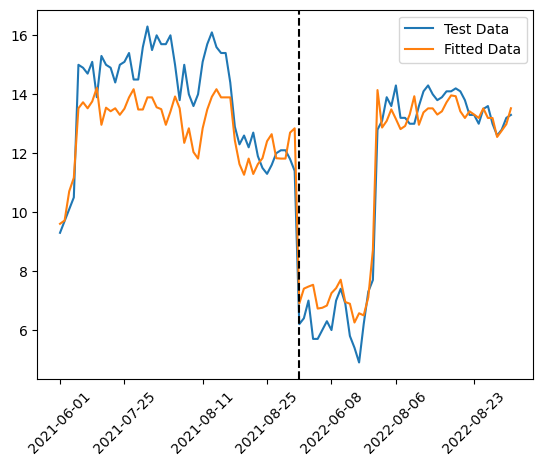

In [60]:
import matplotlib.dates as mdates

print(y_test)
print(yfit)
print(Y)
plt.plot(y_test)
plt.plot(yfit)
plt.show()

date=data[data['yr']>=2021][  'Date']
print(date)
plt.plot(date,y_test , label='Test Data')

#plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter())  # Formats labels concisely

plt.plot(date,yfit , label='Fitted Data')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Display every 10th label
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts for missing dates
plt.axvline(x= "2022-06-01", color='black', linestyle='--')
plt.gca().xaxis.set_tick_params(rotation=45 )  # Rotate labels for readability
#pd.dataframe("date"= ,"y_test"= ,"yfit"=yfit)
plt.legend()

In [22]:
#plt.hist(y_test , alpha=0.5)
#plt.show()

#plt.hist(yfit , alpha=0.5)
#plt.show()

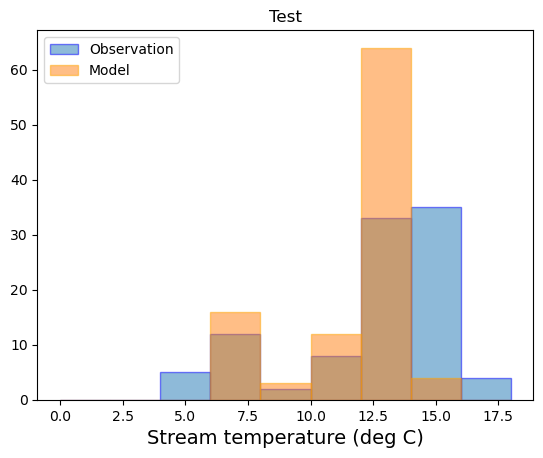

In [26]:
bins = np.arange(10, 25, 2)
bins = np.arange(0, 20, 2)
bars1, _, _ = plt.hist(y_test , alpha=0.5 , label="Observation",bins=bins , edgecolor='blue')
bars2, _, _ = plt.hist(yfit , alpha=0.5, label="Model",bins=bins , edgecolor='orange')
plt.legend(   )
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")
plt.show()

In [24]:
#plt.hist(y_test , alpha=0.5)
#plt.hist(yfit , alpha=0.5)

#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["y_test","yfit"])
#plt.legend()

In [61]:
#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["observation","model"])
#plt.legend()
#plt.xlabel("Stream temperature (deg C)", fontsize=14 )
#plt.title("Test")